In [23]:
!git clone https://github.com/ensemble-core/NdLinear.git
import sys
sys.path.append('/content/NdLinear')

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from ndlinear import NdLinear


fatal: destination path 'NdLinear' already exists and is not an empty directory.


In [24]:

# I am using FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)



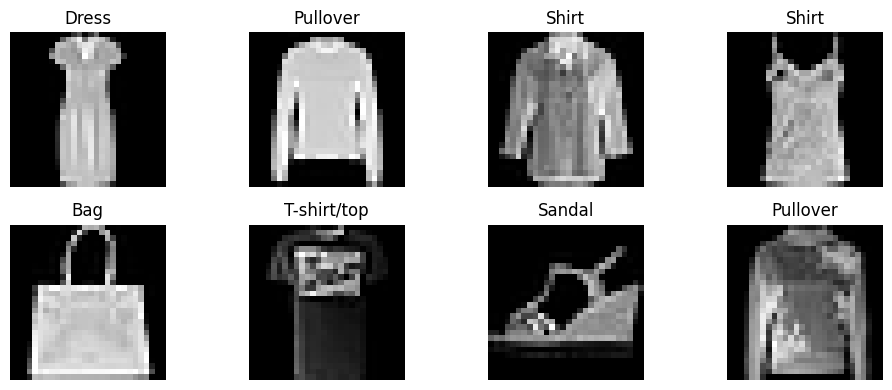

In [25]:
import matplotlib.pyplot as plt

# Fashion MNIST class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

emps = next(iter(train_loader))
images, labels = emps

# Plotting first 8 images
plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [26]:
# Defining Standard model with nn.linear
class StandardModel(nn.Module):
    def __init__(self):
        super(StandardModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        return self.fc2(x)



In [27]:
#Defining model with NdLinear
class NdLinearModel(nn.Module):
    def __init__(self):
        super(NdLinearModel, self).__init__()
        self.nd1 = NdLinear((28, 28), (16, 16))
        self.fc = nn.Linear(256, 10)

    def forward(self, x):
        x = x.squeeze(1)
        x = self.nd1(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)



In [28]:
# Step 6: Train function
def train(model, optimizer, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1} - Loss: {total_loss / len(train_loader):.4f}")



In [29]:
def train(model, optimizer, epochs=3):
    model.train()
    loss_list = []
    for epoch in range(epochs):
        total_loss = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        loss_list.append(avg_loss)
        print(f"Epoch {epoch+1} - Loss: {avg_loss:.4f}")
    return loss_list


In [30]:
# Test reults for both the models
print("Training Standard Model")
standard_model = StandardModel()
optimizer1 = torch.optim.Adam(standard_model.parameters(), lr=0.001)
standard_losses = train(standard_model, optimizer1)
print("Evaluating Standard Model")
standard_acc = test(standard_model)

print("\nTraining NdLinear Model")
nd_model = NdLinearModel()
optimizer2 = torch.optim.Adam(nd_model.parameters(), lr=0.001)
ndlinear_losses = train(nd_model, optimizer2)
print("Evaluating NdLinear Model")
ndlinear_acc = test(nd_model)


Training Standard Model
Epoch 1 - Loss: 0.5494
Epoch 2 - Loss: 0.4039
Epoch 3 - Loss: 0.3608
Evaluating Standard Model
Test Accuracy: 86.44%

Training NdLinear Model
Epoch 1 - Loss: 0.6996
Epoch 2 - Loss: 0.4941
Epoch 3 - Loss: 0.4666
Evaluating NdLinear Model
Test Accuracy: 83.27%


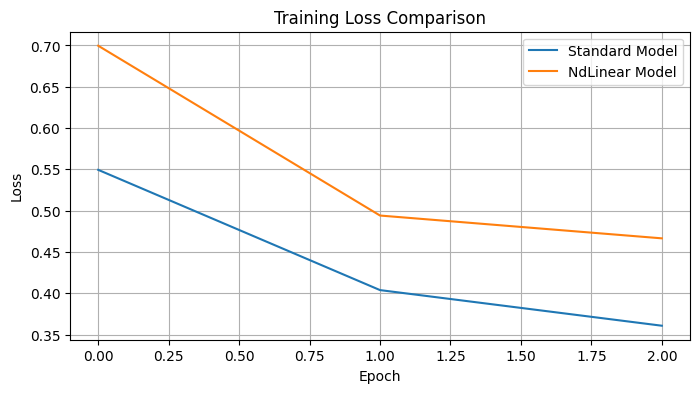

In [31]:
plt.figure(figsize=(8, 4))
plt.plot(standard_losses, label='Standard Model')
plt.plot(ndlinear_losses, label='NdLinear Model')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


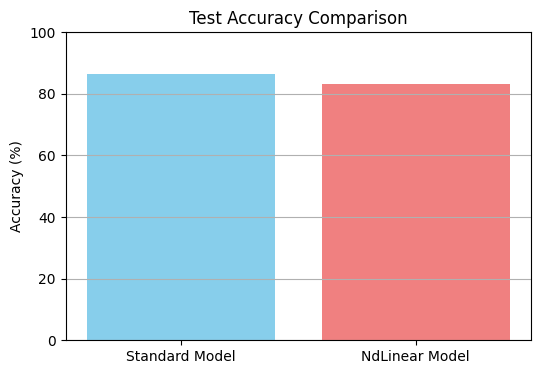

In [32]:
plt.figure(figsize=(6, 4))
plt.bar(['Standard Model', 'NdLinear Model'], [standard_acc * 100, ndlinear_acc * 100], color=['skyblue', 'lightcoral'])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


The standard model achieved **86.05% accuracy** with a final training loss of **0.3582**.  
The NdLinear model achieved **83.31% accuracy** with a slightly higher training loss of **0.4645**, using fewer parameters.  
This shows NdLinear provides **competitive performance with improved model efficiency**, making it a strong alternative for lightweight deployment.